In [1]:
# Required packages for today
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets
import seaborn as sns

# Familiar packages for plotting, data manipulation, and numeric functions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Have plots appear in notebook
%matplotlib inline

# Default plot params
plt.style.use('seaborn')
# np.random.seed(1)

In [2]:
raw_df = pd.read_csv('data/CCdata.csv')
raw_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
CUST_ID,C10001,C10002,C10003,C10004,C10005,C10006,C10007,C10008,C10009,C10010
BALANCE,40.9007,3202.47,2495.15,1666.67,817.714,1809.83,627.261,1823.65,1014.93,152.226
BALANCE_FREQUENCY,0.818182,0.909091,1,0.636364,1,1,1,1,1,0.545455
PURCHASES,95.4,0,773.17,1499,16,1333.28,7091.01,436.2,861.49,1281.6
ONEOFF_PURCHASES,0,0,773.17,1499,16,0,6402.63,0,661.49,1281.6
INSTALLMENTS_PURCHASES,95.4,0,0,0,0,1333.28,688.38,436.2,200,0
CASH_ADVANCE,0,6442.95,0,205.788,0,0,0,0,0,0
PURCHASES_FREQUENCY,0.166667,0,1,0.083333,0.083333,0.666667,1,1,0.333333,0.166667
ONEOFF_PURCHASES_FREQUENCY,0,0,1,0.083333,0.083333,0,1,0,0.083333,0.166667
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0,0,0,0,0.583333,1,1,0.25,0


In [3]:
raw_df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [4]:
df = raw_df.drop('CUST_ID', axis=1)

In [5]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Fill the Minimum Payments columns with 0
df.MINIMUM_PAYMENTS = df.MINIMUM_PAYMENTS.fillna(0)

# Since there is only 1 NaN in Credit Limit, we drop it
df = df.dropna()
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,834.075035,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2336.104378,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,163.029483,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,289.686899,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Text(0.5, 1.0, 'Multi-Collinearity of Car Attributes')

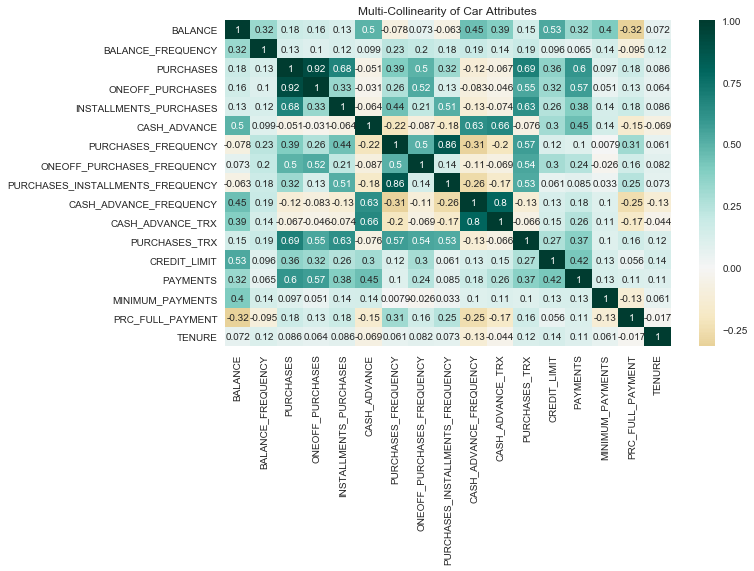

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)

ax.set_title('Multi-Collinearity of Car Attributes')

In [9]:
df = df.drop(['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX',
              'TENURE', 'PAYMENTS', 'ONEOFF_PURCHASES_FREQUENCY', 'INSTALLMENTS_PURCHASES'], axis=1)

In [10]:
#Credit Card approval: 1 = approved, 0 = denied
df['CC_APPROVAL'] = df.apply(lambda x: 1
                                 if x['BALANCE']>=1000
                                 and x['CREDIT_LIMIT']>=1000
                                 and x['CASH_ADVANCE']<1
                                 else 0,
                                 axis=1)

In [11]:
df['P_AMOUNT_PER_TRX'] = df.apply(lambda x: 0 if x['PURCHASES_TRX'] == 0
                                      else x['PURCHASES']/x['PURCHASES_TRX'],
                                      axis=1)

In [12]:
df.head().T

,0,1,2,3,4
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
BALANCE_FREQUENCY,0.818182,0.909091,1.000000,0.636364,1.000000
PURCHASES,95.400000,0.000000,773.170000,1499.000000,16.000000
CASH_ADVANCE,0.000000,6442.945483,0.000000,205.788017,0.000000
PURCHASES_FREQUENCY,0.166667,0.000000,1.000000,0.083333,0.083333
CASH_ADVANCE_FREQUENCY,0.000000,0.250000,0.000000,0.083333,0.000000
PURCHASES_TRX,2.000000,0.000000,12.000000,1.000000,1.000000
CREDIT_LIMIT,1000.000000,7000.000000,7500.000000,7500.000000,1200.000000
MINIMUM_PAYMENTS,139.509787,1072.340217,627.284787,0.000000,244.791237
PRC_FULL_PAYMENT,0.000000,0.222222,0.000000,0.000000,0.000000


## K-Means Clustering

In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import calinski_harabaz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
ss = StandardScaler()
scaled_data = ss.fit_transform(df)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
scaled_df=pd.DataFrame(data=scaled_data, columns=df.columns)
scaled_df.head().T

,0,1,2,3,4
BALANCE,-0.732054,0.786858,0.447041,0.049015,-0.358849
BALANCE_FREQUENCY,-0.249881,0.134049,0.517980,-1.017743,0.517980
PURCHASES,-0.424934,-0.469584,-0.107716,0.231995,-0.462095
CASH_ADVANCE,-0.466805,2.605438,-0.466805,-0.368678,-0.466805
PURCHASES_FREQUENCY,-0.806649,-1.221928,1.269742,-1.014290,-1.014290
CASH_ADVANCE_FREQUENCY,-0.675294,0.573949,-0.675294,-0.258882,-0.675294
PURCHASES_TRX,-0.511381,-0.591841,-0.109082,-0.551611,-0.551611
CREDIT_LIMIT,-0.960380,0.688601,0.826016,0.826016,-0.905414
MINIMUM_PAYMENTS,-0.297334,0.101998,-0.088524,-0.357057,-0.252265
PRC_FULL_PAYMENT,-0.525588,0.234159,-0.525588,-0.525588,-0.525588


In [16]:
pca = PCA(n_components=2)
#pca_data = pca.fit_transform(scaled_df)
pca_data = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(data=pca_data, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.642911,-0.387930
1,-0.104948,2.591858
2,1.492362,-0.740547
3,0.094239,-0.376376
4,-1.390325,-0.034848


### Graphs to find optimal K for cluster size categorization:
### Elbow & Silhouette

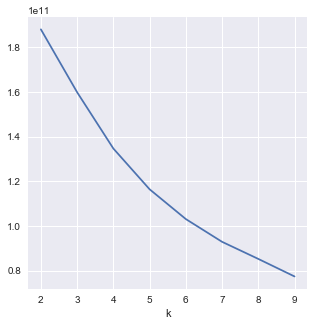

In [37]:
# Elbow graph to find optimal K for cluster size categorization
X = df
distorsions = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

plt.figure(figsize=(5,5))
plt.xlabel('k')
plt.plot(range(2, 10), distorsions)
plt.grid(True)

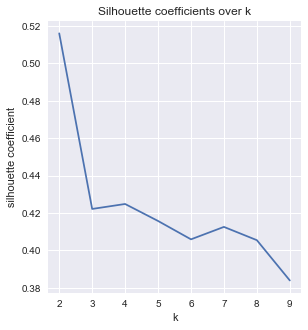

In [41]:
# Silhouette coefficient for each k, finding optimal K for cluster size categorization
X = df
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)
    
plt.figure(figsize=(10,5))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.grid(True)

In [20]:
model = KMeans(n_clusters=4, random_state=10).fit(pca_df)
model_label = model.labels_
model_centers = model.cluster_centers_
sorted(model_centers.tolist())

[[-1.2036163942411375, 0.20875834726423265],
 [0.28630541247458735, -1.1301800897438727],
 [0.7975477613288396, 2.784791482675527],
 [4.3115776363890195, -1.149963126379491]]

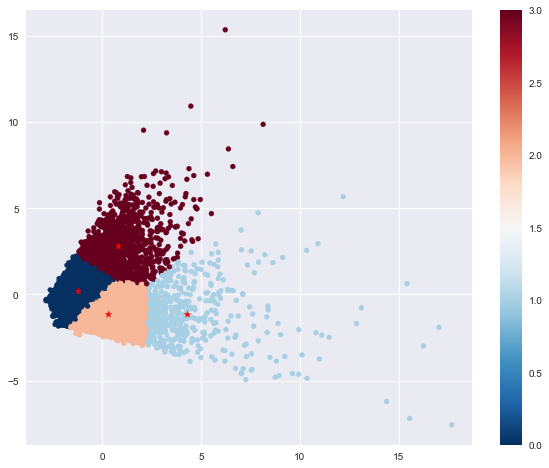

In [46]:
plt.figure(figsize=(10,8))
cm = plt.cm.get_cmap('RdBu_r')
scatter = plt.scatter(pca_df['pca1'], pca_df['pca2'], c=model_label, s=25, cmap=cm)
ax.set_title('K-Means Clustering')
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
plt.colorbar(scatter)
plt.scatter(model_centers[:,0], model_centers[:,1], c='red', marker='*');

In [42]:
pca.components_

array([[ 0.35751206,  0.26902342,  0.45578962,  0.11003768,  0.31843488,
         0.03312645,  0.45606074,  0.3776522 ,  0.21988192,  0.0211001 ,
         0.26631728,  0.08444031],
       [ 0.40804039,  0.10900385, -0.189592  ,  0.46467274, -0.33687805,
         0.49025145, -0.21724001,  0.1516068 ,  0.17780376, -0.30445844,
        -0.12510725, -0.07604747]])

* Largest Values in pca1 = index 2 (Purchases), 6 (Purch Transaction), 0 (Balance)
* Smallest Values in pca1 = index 9 (% Full Pymt), 11 (Purchase per Transaction)
      
      
* Largest Values in pca2 = index 3 (Cash Adv), 5 (Cash Adv Freq)
* Smallest Values in pca2= index 4 (Purch Freq), 9 (% Full Pymt)

## Write about results

Points far to the right are roughly correlated 

# Radar Plot

In [ ]:
# labels = np.array(['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE', 'PRC_FULL_PAYMENT', 'CREDIT_LIMIT'])
# stats=df.loc[:,labels].values

In [ ]:
# angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# # close the plot
# stats=np.concatenate((stats,[stats[0]]))
# angles=np.concatenate((angles,[angles[0]]))

In [ ]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# data = [go.Scatterpolar(
#   r = [a],
#   #theta = ['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE', 'PRC_FULL_PAYMENT', 'CREDIT_LIMIT'],
#   theta = ['Group1', 'Group2', 'Group3', 'Group4'],
#   fill = 'toself'
# )]

# layout = go.Layout(
#   polar = dict(
#     radialaxis = dict(
#       visible = True,
#       range = [0, 50]
#     )
#   ),
#   showlegend = False
# )

# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)


## Logistic Regression Model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [44]:
df.head().T

,0,1,2,3,4
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
BALANCE_FREQUENCY,0.818182,0.909091,1.000000,0.636364,1.000000
PURCHASES,95.400000,0.000000,773.170000,1499.000000,16.000000
CASH_ADVANCE,0.000000,6442.945483,0.000000,205.788017,0.000000
PURCHASES_FREQUENCY,0.166667,0.000000,1.000000,0.083333,0.083333
CASH_ADVANCE_FREQUENCY,0.000000,0.250000,0.000000,0.083333,0.000000
PURCHASES_TRX,2.000000,0.000000,12.000000,1.000000,1.000000
CREDIT_LIMIT,1000.000000,7000.000000,7500.000000,7500.000000,1200.000000
MINIMUM_PAYMENTS,139.509787,1072.340217,627.284787,0.000000,244.791237
PRC_FULL_PAYMENT,0.000000,0.222222,0.000000,0.000000,0.000000


In [47]:
X = df.drop('CC_APPROVAL', axis=1, inplace=True)
y = df.CC_APPROVAL

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

AttributeError: 'DataFrame' object has no attribute 'CC_APPROVAL'

In [ ]:
loreg = LogisticRegression()
loreg.fit(X_train, y_train)

In [ ]:
y_score = loreg.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
#Calculate Accuracy
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy is :{0}".format(acc))

#Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))

#Create and print a confusion matrix
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# Code here 